In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv("data/train.csv") 
test = pd.read_csv("data/test.csv")
valid = pd.read_csv("data/valid.csv")

In [3]:
#inny podział
from sklearn.model_selection import train_test_split

train_full = pd.concat([train, valid], axis=0)

X = train_full.drop(["Chronic Medical Conditions", "Income"], axis=1)
y = train_full["Chronic Medical Conditions"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_test, y_test = train.drop(["Chronic Medical Conditions", "Income"], axis=1), test["Chronic Medical Conditions"]

# Logistic regression - najlepsze dobrane parametry

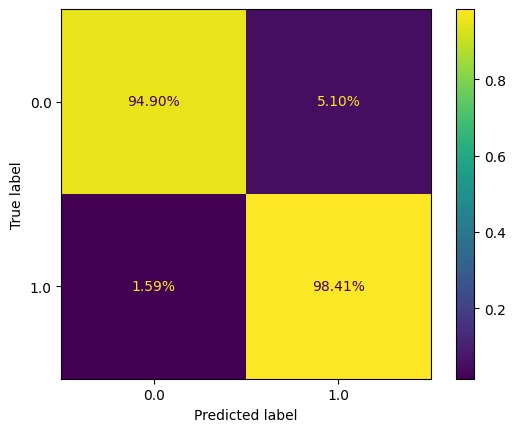

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l2",solver="lbfgs", max_iter=20, n_jobs=-1, random_state=42)
lr.fit(X_train, y_train)
y_pred_valid = lr.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [7]:
y_pred_train = lr.predict(X_train)
print("=== TRAIN ===")
print(classification_report(y_train, y_pred_train))

=== TRAIN ===
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     94683
         1.0       0.97      0.98      0.98    170128

    accuracy                           0.97    264811
   macro avg       0.97      0.97      0.97    264811
weighted avg       0.97      0.97      0.97    264811



In [7]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     23804
         1.0       0.97      0.98      0.98     42399

    accuracy                           0.97     66203
   macro avg       0.97      0.97      0.97     66203
weighted avg       0.97      0.97      0.97     66203



# KNNeighbors Classifier

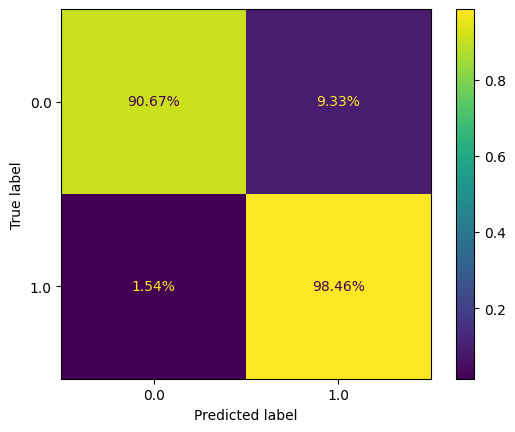

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=8, weights="uniform", n_jobs=-1)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [11]:
y_pred_train = model.predict(X_train)
print("=== TRAIN ===")
print(classification_report(y_train, y_pred_train))
print(classification_report(y_valid, y_pred_valid))

=== TRAIN ===
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95     94683
         1.0       0.96      0.99      0.98    170128

    accuracy                           0.97    264811
   macro avg       0.97      0.96      0.96    264811
weighted avg       0.97      0.97      0.97    264811

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94     23804
         1.0       0.95      0.98      0.97     42399

    accuracy                           0.96     66203
   macro avg       0.96      0.95      0.95     66203
weighted avg       0.96      0.96      0.96     66203



# Decision Tree

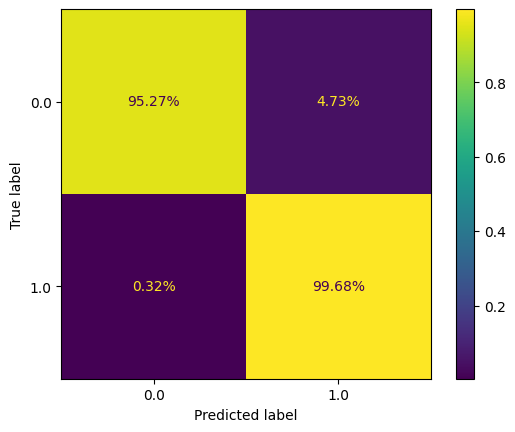

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=7, criterion="gini")
model.fit(X_train, y_train)

y_pred_valid = model.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [13]:
y_pred_train = model.predict(X_train)
print("=== TRAIN ===")
print(classification_report(y_train, y_pred_train))
print(classification_report(y_valid, y_pred_valid))

=== TRAIN ===
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     94683
         1.0       0.97      1.00      0.99    170128

    accuracy                           0.98    264811
   macro avg       0.98      0.98      0.98    264811
weighted avg       0.98      0.98      0.98    264811

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     23804
         1.0       0.97      1.00      0.99     42399

    accuracy                           0.98     66203
   macro avg       0.98      0.97      0.98     66203
weighted avg       0.98      0.98      0.98     66203



# Random forest

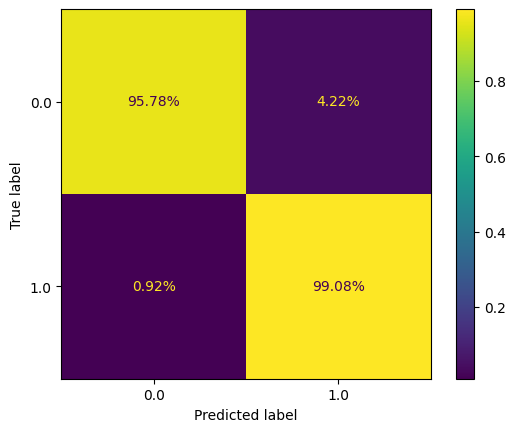

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion="entropy", max_features="log2", n_estimators=800)
model.fit(X_train, y_train)

y_pred_valid = model.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [9]:
y_pred_train = model.predict(X_train)
print("=== TRAIN ===")
print(classification_report(y_train, y_pred_train))
print(classification_report(y_valid, y_pred_valid))

=== TRAIN ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     94683
         1.0       1.00      1.00      1.00    170128

    accuracy                           1.00    264811
   macro avg       1.00      1.00      1.00    264811
weighted avg       1.00      1.00      1.00    264811

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     23804
         1.0       0.98      0.99      0.98     42399

    accuracy                           0.98     66203
   macro avg       0.98      0.97      0.98     66203
weighted avg       0.98      0.98      0.98     66203

